# Processing Biomechanical Data

### From Motion Analysis data: Running data with 40 strides

1.	Calculate the average joint angles across strides for the hip, knee, and ankle during stance phase.

2.	Plot the average joint angle time series data.  

3.	Calculate the average vertical GRF (y-axis). 

4.	Plot the vertical GRFs time series data. 

## Import libraries and set directory

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import filedialog


# Get file directory
folder_path = filedialog.askdirectory()

## Calculate Average Joint Angles

In [2]:
# Function for averaging signal components
def mean_signal(x, axis=1):
    """Averages signal components. (Ex: Each component is a trial.)
       Assumes axis is an int. Gets signal shape and averages across rows (1) or cols (0)
       Returns the average array, or errors if the axis is set wrong)"""
    le, num = x.shape  # length and number of components of signal

    if axis == 1:
        # get the average signal
        mean = x.sum(axis=axis) / num
        return mean
    elif axis == 0:
        # get the average signal
        mean = x.sum(axis=axis) / le
        return mean
    else:
        raise ValueError


# Calculate average signals
average_signals = []
for file in os.listdir(folder_path):
    if file.endswith(".txt"):
        # Extract the file name without the extension
        file_name = os.path.splitext(file)[0]

        # Construct the full file path
        file_path = os.path.join(folder_path, file)
        
        # Read txt data from file, skips first 4 rows, set first column as index
        df = pd.read_csv(file_path, delimiter='\t', skiprows=[0, 1, 2, 3], index_col=0)
        data = df.values
        
        # get mean signals (x: ant/post, y: vertical, z: medial/lateral)
        ave = {'x': mean_signal(data[:, ::3]), 'y': mean_signal(data[:, 1::3]), 'z': mean_signal(data[:, 2::3])}
    
        # Store data
        average_signals.append({'File': file_name, 'X': ave['x'], 'Y': ave['y'], 'Z': ave['z']})
    

# Create DataFrame from average_signals
average_df = pd.DataFrame(average_signals)

# Separate the kinematics from the GRF data (in order of Hip, Knee, Ankle)
kinematics = average_df.iloc[[2,3,0], :]
GRF = average_df.iloc[[1], :]

## Plot Kinematics

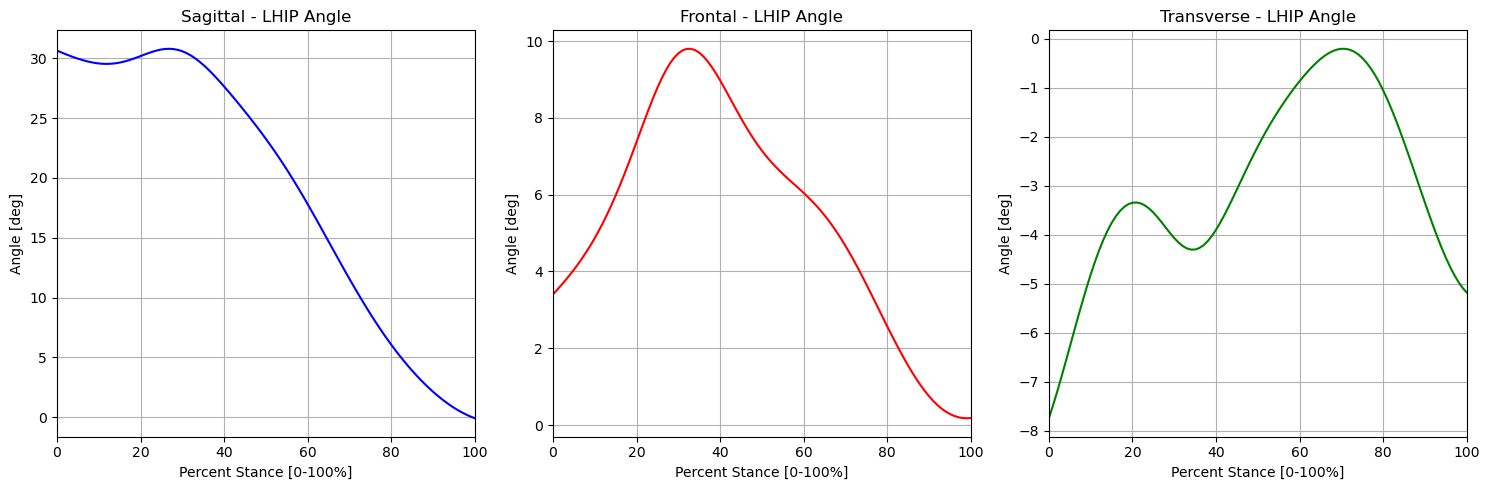

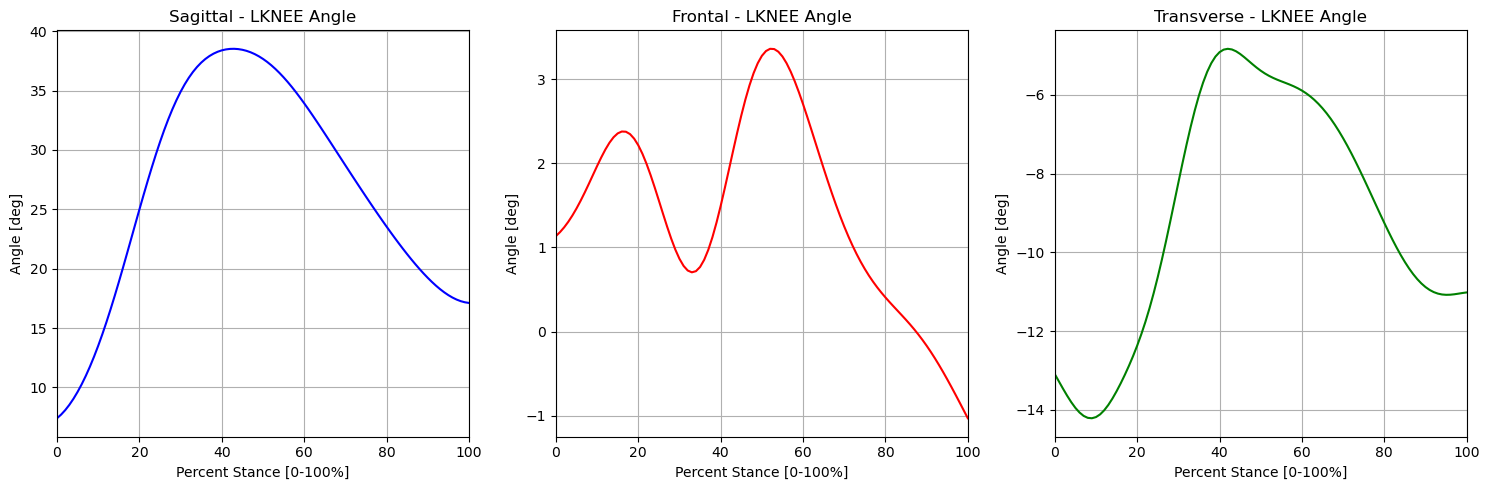

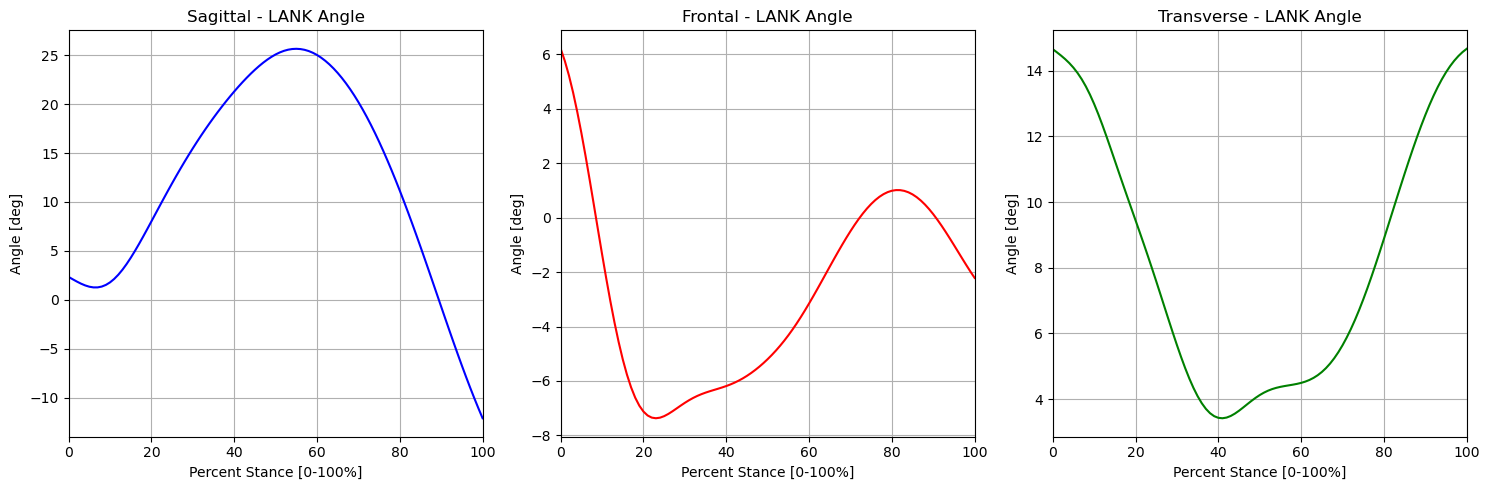

In [3]:
# Function for plotting the signals
def plot_line(signal, indices, title, xaxis='', yaxis='', color=''):
    """Creates a plot of a signal with specified properties:
            signal: The signal data to be plotted.
            indices: The x-axis values (indices) corresponding to the signal data.
            title: The title of the plot.
            xaxis: The label for the x-axis.
            yaxis: The label for the y-axis.
            color: The color of the plot line."""
    # create figure and set axes
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    # plot signal
    plt.plot(indices, signal, color=color)
    plt.xlim(0, 100)  # Set x-axis limit
    plt.grid(True)

    
# Plot the mean signals from the DataFrame
for index, row in kinematics.iterrows():
    """ index represents the index of the current row in the kinematics DataFrame.
        row contains the data for the current row, including the file name and signal values.
        kinematics.iterrows() is used to iterate over the rows of the DataFrame. 
        """
    ind = list(range(0, 101))  # ind: represent the x-axis values (indices) for the plot.
    xax = 'Percent Stance [0-100%]'  # x-axis label
    yax = 'Angle [deg]'              # y-axis label
    plt.figure(figsize=(15, 5)) 
    plt.subplot(131)
    plot_line(row['Z'], ind, f'Sagittal - {row["File"]}', xaxis=xax, yaxis=yax, color='blue')
    plt.subplot(132)
    plot_line(row['X'], ind, f'Frontal - {row["File"]}', xaxis=xax, yaxis=yax, color='red')  
    plt.subplot(133)
    plot_line(row['Y'], ind, f'Transverse - {row["File"]}', xaxis=xax, yaxis=yax, color='green')
    plt.tight_layout()  
    plt.show()

## Plot VGRF with peak value

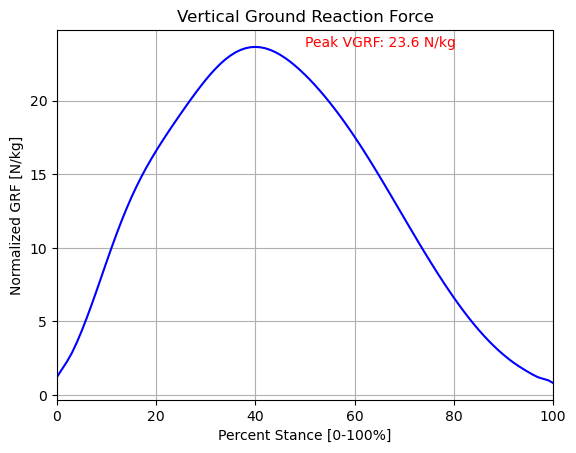

In [4]:
# Plot the Y signal from GRF
for index, row in GRF.iterrows():
    ind = list(range(0, 101))
    plot_line(row['Y'], ind, "Vertical Ground Reaction Force",'Percent Stance [0-100%]','Normalized GRF [N/kg]','blue')
    
    # Calculate Peak VGRF
    vgrf = row['Y']
    max_vgrf = round(max(vgrf), 1)
    
    # Add label with peak value to the plot
    plt.text(50, max_vgrf + 0.05, f"Peak VGRF: {max_vgrf} N/kg", color='red')
    plt.show()